In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [3]:
import nltk
import os

# Set the custom download path for NLTK data
custom_download_path = './nltk_data'

# Make sure the directory exists; if not, create it
os.makedirs(custom_download_path, exist_ok=True)

# Append the custom download path to NLTK data path
nltk.data.path.append(custom_download_path)

# Download NLTK resources to the custom path
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Tanvi
[nltk_data]     Saxena\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Tanvi
[nltk_data]     Saxena\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Tanvi
[nltk_data]     Saxena\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [5]:
train_data = pd.read_csv("train_data.txt", delimiter=':::' ,header = None ,engine='python')
test_data  = pd.read_csv("test_data.txt", delimiter=':::' ,header = None ,engine='python')

test_data_solution  = pd.read_csv("test_data_solution.txt", delimiter=':::' ,header = None ,engine='python')

In [6]:
print("shape",train_data.shape)
train_data.head()

shape (54214, 4)


,0,1,2,3
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [7]:
print("shape",test_data_solution.shape)
test_data_solution.head()

shape (54200, 4)


,0,1,2,3
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papÃ¡ (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [8]:
df = pd.concat((train_data ,test_data_solution))
df.columns = ["id" ,"Title","Genre","Description"]
df.head()

,id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [9]:
df.shape

(108414, 4)

In [10]:
df.duplicated().sum() ## Will give us a number of duplicates

df.drop_duplicates(inplace = True)

In [11]:
df.isna().sum()  # Will check for any duplicates

df.dropna( inplace = True )

In [12]:
df.shape

(108414, 4)

In [13]:
stopword = set(stopwords.words('english'))

def preprocessing(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation using regular expressions
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove specific characters #, @, and $
    text = re.sub(r'[#@\$]', '', text)
    
    # tokenize and convert to list
    tokens = word_tokenize(text)
    
    ## Lemmatize it 
    lemmatizer  = WordNetLemmatizer()
    
    ## lemmatize each token
   # text = [lemmatizer.lemmatize(token) for token in tokens]
    text = text.split()
    
    text = [word for word in text if word not in stopword]
    
    
    return " ".join(text)

In [14]:
df["Despcription_clean"] =  df["Description"].apply(preprocessing)

In [15]:
df.head()

,id,Title,Genre,Description,Despcription_clean
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents 10yearol...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...


In [16]:
df["Genre"].value_counts()

 drama           27225
 documentary     26192
 comedy          14893
 short           10145
 horror           4408
 thriller         3181
 action           2629
 western          2064
 reality-tv       1767
 family           1567
 adventure        1550
 music            1462
 romance          1344
 sci-fi           1293
 adult            1180
 crime            1010
 animation         996
 sport             863
 talk-show         782
 fantasy           645
 mystery           637
 musical           553
 biography         529
 history           486
 game-show         387
 news              362
 war               264
Name: Genre, dtype: int64

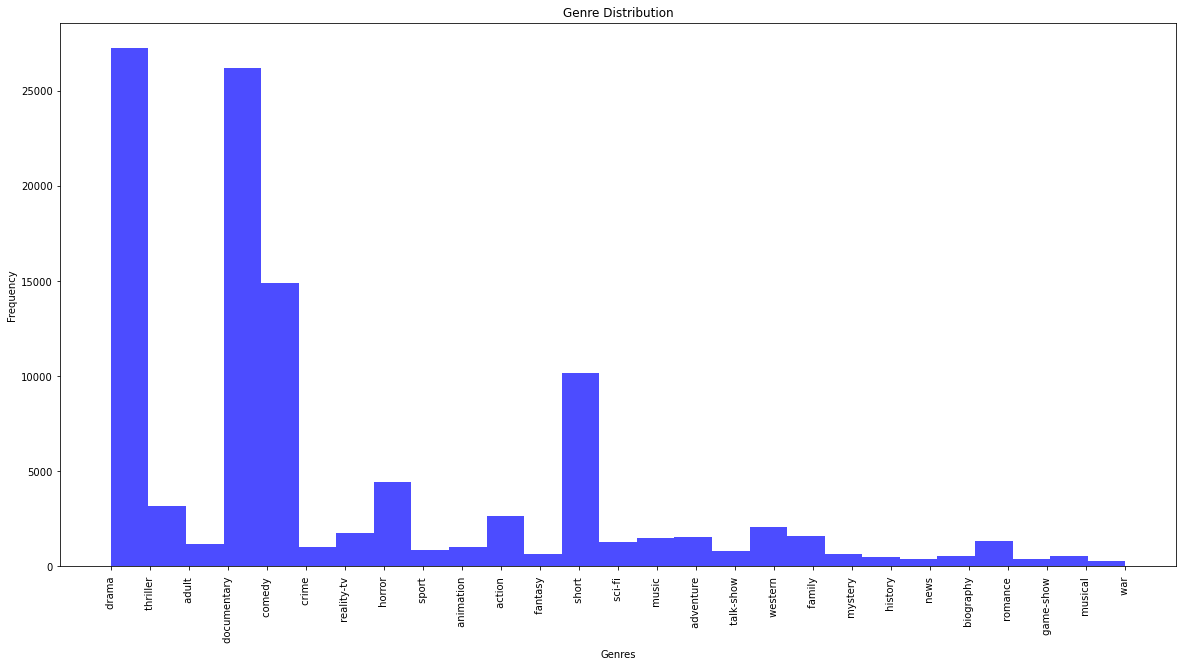

In [17]:
plt.figure(figsize=(20, 10))
plt.hist(df["Genre"],bins =27 , color='blue', alpha=0.7)
plt.title("Genre Distribution")
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

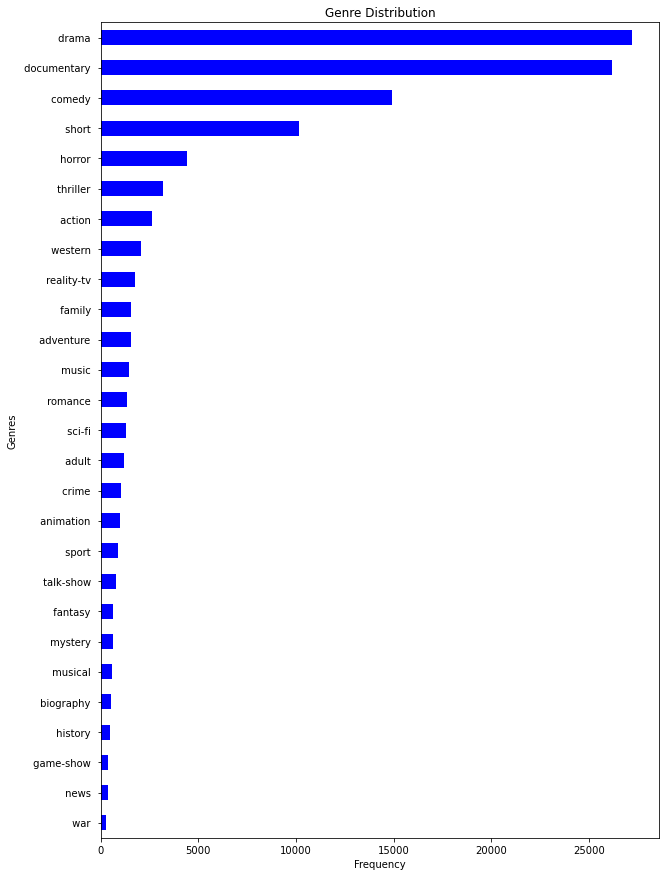

In [18]:
genre_counts = df["Genre"].value_counts()
sorted_genres = genre_counts.sort_values(ascending=True)
# Create a horizontal histogram of genre distribution
plt.figure(figsize=(10, 15))
sorted_genres.plot(kind='barh',color = "blue", alpha=1 )
plt.title("Genre Distribution")
plt.xlabel("Frequency")
plt.ylabel("Genres")
plt.show()


In [21]:
data = df.drop(["Title","id"] , axis = 1) # will drop column 
data.head()

,Genre,Description,Despcription_clean
0,drama,Listening in to a conversation between his do...,listening conversation doctor parents 10yearol...
1,thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [23]:
#Convert sentiment labels to numerical values for modeling
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Genre_encoded'] = label_encoder.fit_transform(data['Genre'])
data['Genre_encoded']

class_names= list(label_encoder.classes_)
class_names 

[' action ',
 ' adult ',
 ' adventure ',
 ' animation ',
 ' biography ',
 ' comedy ',
 ' crime ',
 ' documentary ',
 ' drama ',
 ' family ',
 ' fantasy ',
 ' game-show ',
 ' history ',
 ' horror ',
 ' music ',
 ' musical ',
 ' mystery ',
 ' news ',
 ' reality-tv ',
 ' romance ',
 ' sci-fi ',
 ' short ',
 ' sport ',
 ' talk-show ',
 ' thriller ',
 ' war ',
 ' western ']

In [24]:
data.head()

,Genre,Description,Despcription_clean,Genre_encoded
0,drama,Listening in to a conversation between his do...,listening conversation doctor parents 10yearol...,8
1,thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...,24
2,adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...,1
3,drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...,8
4,drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...,8


In [25]:
## Split the data
x = data["Despcription_clean"]
y = data["Genre"]

x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.5)

In [26]:
vectorize = CountVectorizer()
x_train1 = vectorize.fit_transform(x_train)
x_test1 =  vectorize.transform(x_test)

Model Score on Training data 0.6378327522275721
Model Score on Training data 0.5283819432914568
               precision    recall  f1-score   support

      action        0.04      0.73      0.08        78
       adult        0.02      0.76      0.04        17
   adventure        0.07      0.49      0.13       110
   animation        0.00      0.00      0.00         0
   biography        0.00      0.00      0.00         0
      comedy        0.44      0.53      0.48      6204
       crime        0.00      0.00      0.00         5
 documentary        0.90      0.57      0.70     20745
       drama        0.83      0.46      0.59     24587
      family        0.00      1.00      0.01         3
     fantasy        0.00      0.00      0.00        13
   game-show        0.11      1.00      0.20        23
     history        0.00      0.00      0.00         0
      horror        0.28      0.77      0.41       806
       music        0.07      0.87      0.14        61
     musical        0.0

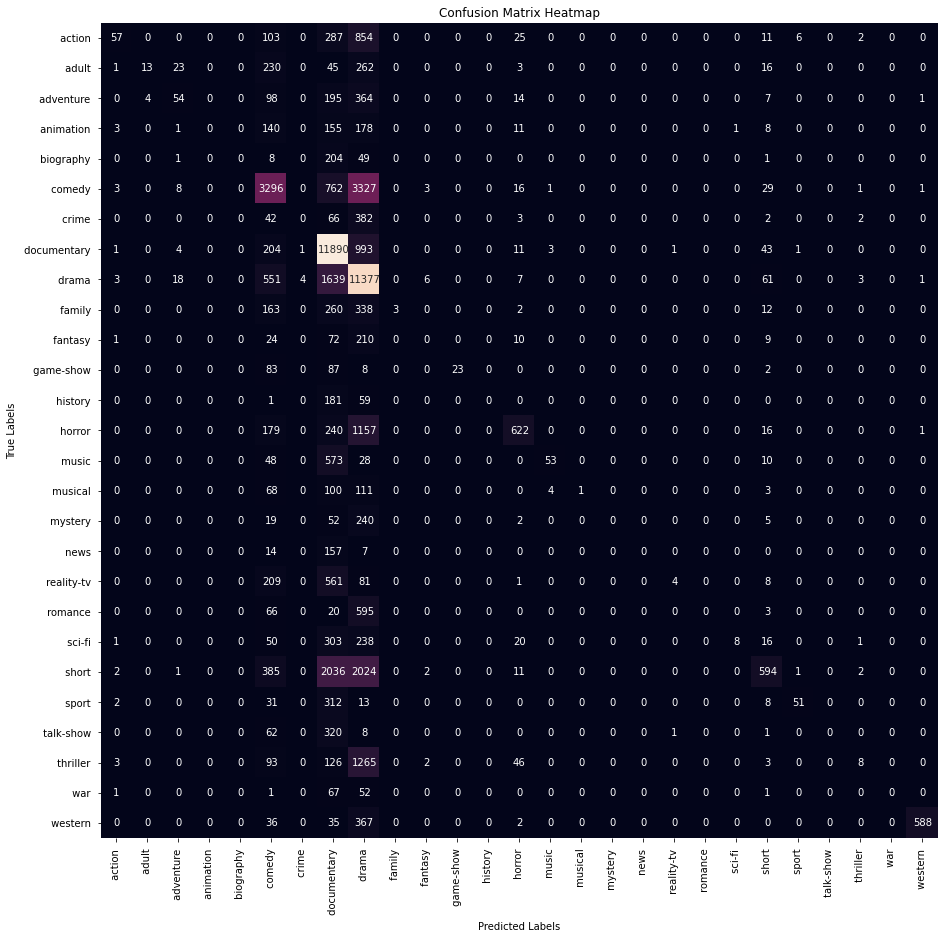

In [27]:
mnb = MultinomialNB()
mnb.fit(x_train1 ,y_train)
print("Model Score on Training data",mnb.score(x_train1 ,y_train))
print("Model Score on Training data",mnb.score(x_test1 ,y_test))
y_pred = mnb.predict(x_test1)

print(classification_report(y_pred ,y_test))
 
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cbar=False, 
            xticklabels=class_names, yticklabels=class_names)  # Replace 'class_names' with your class labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()